In [5]:
import pandas as pd
import os
from settings import comparison_dict

In [6]:
def load_data(fname, geog):
    df = pd.DataFrame()
    for scen_name, scen_path in comparison_dict.items():
        _df = pd.read_csv(os.path.join(scen_path,r'outputs\compare', geog ,fname))
        _df['source'] = scen_name
        df = df.append(_df)
    
    return df

In [7]:
geog = 'topsheet'

# VMT 
by Facility Type

In [17]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('1_vmt_facility_type.csv', geog)
df = df.pivot_table(index='Facility Type', columns='source', aggfunc='sum', values='VMT')
df = df.reindex(index = ['connector','arterial','highway','Total'])
df

source,Base,Scenario 1,Scenario 2
Facility Type,,,
connector,"5,597,335","5,597,335","5,597,335"
arterial,"39,668,787","39,668,787","39,668,787"
highway,"43,922,022","43,922,022","43,922,022"
Total,"89,188,144","89,188,144","89,188,144"


source,Base,Scenario 1,Scenario 2
Facility Type,,,
connector,"5,597,335","5,597,335","5,597,335"
arterial,"39,668,787","39,668,787","39,668,787"
highway,"43,922,022","43,922,022","43,922,022"
Total,"89,188,144","89,188,144","89,188,144"


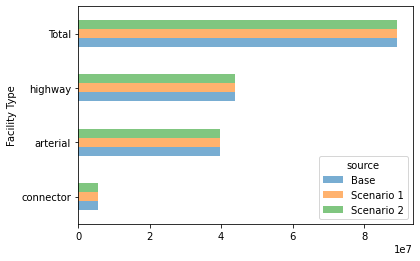

In [18]:
df.plot(kind='barh', alpha=0.6)
df

# VMT
By Time of Day

In [21]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('2_vmt_tod.csv', geog)
df = df.pivot_table(index='period', columns='source', aggfunc='sum', values='VMT')
df = df.reindex(index = ['am','md','pm','ev','ni','Total'])
df

source,Base,Scenario 1,Scenario 2
period,,,
am,"20,762,828","20,762,828","20,762,828"
md,"29,536,017","29,536,017","29,536,017"
pm,"21,051,011","21,051,011","21,051,011"
ev,"11,426,155","11,426,155","11,426,155"
ni,"6,412,135","6,412,135","6,412,135"
Total,"89,188,144","89,188,144","89,188,144"


<AxesSubplot:ylabel='period'>

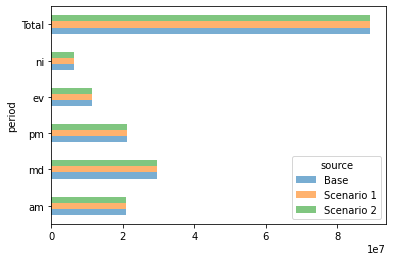

In [23]:
df.plot(kind='barh', alpha=0.6)

# VHT
By Facility Type

source,Base,Scenario 1,Scenario 2
Facility Type,,,
connector,"357,966","357,966","357,966"
arterial,"1,391,371","1,391,371","1,391,371"
highway,"1,073,257","1,073,257","1,073,257"
Total,"2,822,594","2,822,594","2,822,594"


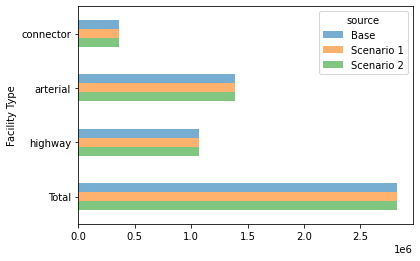

In [37]:
df = load_data('3_vht_facility_type.csv', geog)
df = df.pivot_table(index='Facility Type', columns='source', aggfunc='sum', values='VHT')
df = df.reindex(index = ['connector','arterial','highway','Total'])
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

## VHT
By Time of Day

source,Base,Scenario 1,Scenario 2
period,,,
am,"671,114","671,114","671,114"
md,"868,404","868,404","868,404"
pm,"730,629","730,629","730,629"
ev,"385,537","385,537","385,537"
ni,"166,910","166,910","166,910"
Total,"2,822,594","2,822,594","2,822,594"


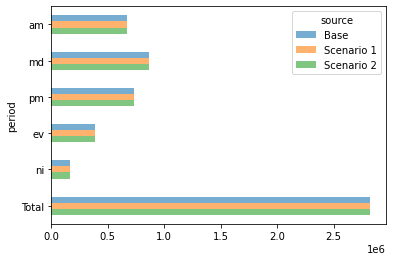

In [35]:
df = load_data('4_vht_tod.csv', geog)
df = df.pivot_table(index='period', columns='source', aggfunc='sum', values='VHT')
df = df.reindex(index = ['am','md','pm','ev','ni','Total'])
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Delay
by Facility Type

source,Base,Scenario 1,Scenario 2
Facility Type,,,
connector,0,0,0
arterial,"163,578","163,578","163,578"
highway,"241,988","241,988","241,988"
Total,"405,566","405,566","405,566"


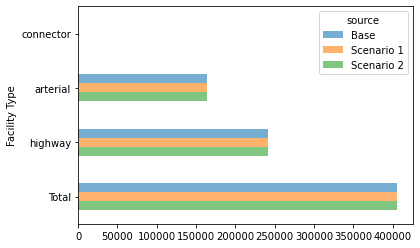

In [39]:
df = load_data('5_delay_facility_type.csv', geog)
df = df.pivot_table(index='Facility Type', columns='source', aggfunc='sum', values='Delay')
df = df.reindex(index = ['connector','arterial','highway','Total'])
df = df.fillna(0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Delay
by Time of Day

source,Base,Scenario 1,Scenario 2
period,,,
am,"127,889","127,889","127,889"
md,"67,266","67,266","67,266"
pm,"151,444","151,444","151,444"
ev,"58,966","58,966","58,966"
ni,0,0,0
Total,"405,566","405,566","405,566"


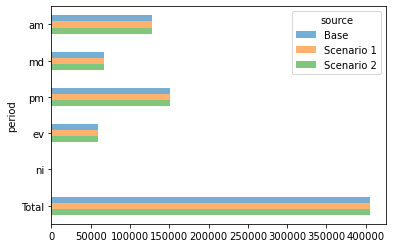

In [36]:
df = load_data('6_delay_tod.csv', geog)
df = df.pivot_table(index='period', columns='source', aggfunc='sum', values='Delay')
df = df.reindex(index = ['am','md','pm','ev','ni','Total'])
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# VMT per Person

In [47]:
pd.options.display.float_format = '{:0,.1f}'.format
df = load_data('7_vmt_per_person.csv', geog)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df[['source','Average VMT per Capita']]

,source,Average VMT per Capita
0,Base,22.1
1,Scenario 1,22.1
2,Scenario 2,22.1


# Trips per Person

In [54]:
df = load_data('8_trips_per_person.csv', geog)
df = df[df['Unnamed: 0'] == 'Model']
df.drop('Unnamed: 0', axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df[['source','Total Trips per Capita']]

,source,Total Trips per Capita
0,Base,4.0
1,Scenario 1,4.0
2,Scenario 2,4.0


# Aveage Trip Distance
by Purpose

source,Base,Scenario 1,Scenario 2
Trip Purpose,,,
All Trips,5.7,5.7,5.7
Change Mode,8.7,8.7,8.7
Escort,5.6,5.6,5.6
Home,5.9,5.9,5.9
Meal,4.7,4.7,4.7
Personal Business,4.8,4.8,4.8
School,3.6,3.6,3.6
Shopping,4.1,4.1,4.1
Social,4.3,4.3,4.3


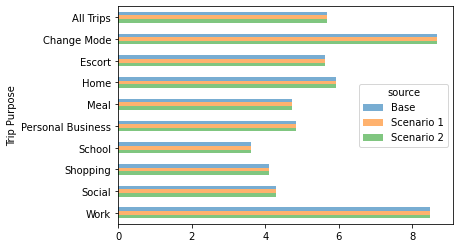

In [67]:
df = load_data('9_trip_distance_purpose.csv', geog)
df = df.pivot_table(index='Trip Purpose', columns='source', aggfunc='sum', values='Model')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Average Trip Distance
By Mode

source,Base,Scenario 1,Scenario 2
Trip Mode,,,
All Trips,5.7,5.7,5.7
Bike,5.1,5.1,5.1
HOV2,5.7,5.7,5.7
HOV3+,5.9,5.9,5.9
SOV,7.0,7.0,7.0
School Bus,3.2,3.2,3.2
Transit,8.6,8.6,8.6
Walk,1.0,1.0,1.0


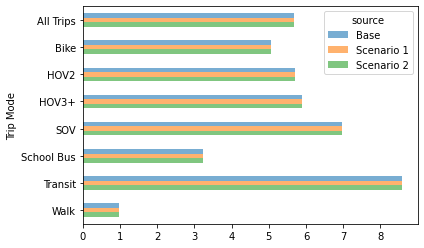

In [74]:
df = load_data('10_trip_distance_mode.csv', geog)
df = df.pivot_table(index='Trip Mode', columns='source', aggfunc='sum', values='Model')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Transit Boardings

source,Base,Scenario 1,Scenario 2
agency_name,,,
Community Transit,"34,180.7","34,180.7","34,180.7"
Everett Transit,"5,440.6","5,440.6","5,440.6"
King County Metro,"409,432.7","409,432.7","409,432.7"
Kitsap Transit,"15,681.9","15,681.9","15,681.9"
Pierce Transit,"33,655.1","33,655.1","33,655.1"
Sound Transit,"157,902.8","157,902.8","157,902.8"
Washington Ferries,"10,795.5","10,795.5","10,795.5"
Region Total,"667,089.3","667,089.3","667,089.3"


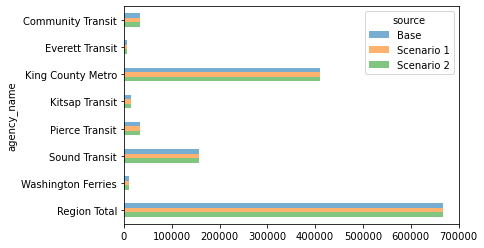

In [78]:
df = load_data('11_transit_boardings.csv', geog)
df = df.pivot_table(index='agency_name', columns='source', aggfunc='sum', values='boardings')
df = df.reindex(index = ['Community Transit','Everett Transit','King County Metro',
                        'Kitsap Transit','Pierce Transit','Sound Transit','Washington Ferries','Region Total'])
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Trip Mode Share

source,Base,Scenario 1,Scenario 2
mode,,,
Bike,1.4%,1.4%,1.4%
HOV2,23.5%,23.5%,23.5%
HOV3+,15.5%,15.5%,15.5%
SOV,41.5%,41.5%,41.5%
School Bus,1.9%,1.9%,1.9%
TNC,1.0%,1.0%,1.0%
Transit,3.0%,3.0%,3.0%
Walk,12.2%,12.2%,12.2%


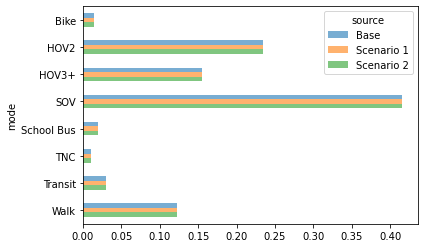

In [81]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('12_trip_mode_share.csv', geog)
df = df.pivot_table(index='mode', columns='source', aggfunc='sum', values='Model')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Home-Based Work Trip Mode Share

source,Base,Scenario 1,Scenario 2
mode,,,
10,0.9%,0.9%,0.9%
Bike,0.9%,0.9%,0.9%
HOV2,22.9%,22.9%,22.9%
HOV3+,15.8%,15.8%,15.8%
SOV,42.8%,42.8%,42.8%
School Bus,1.3%,1.3%,1.3%
TNC,0.3%,0.3%,0.3%
Transit,3.5%,3.5%,3.5%
Walk,11.5%,11.5%,11.5%


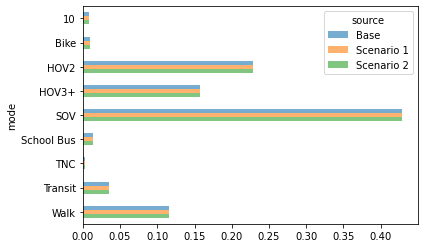

In [85]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('14_other_trip_mode_share.csv', geog)
df = df.pivot_table(index='mode', columns='source', aggfunc='sum', values='share')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df